In [1]:
import pandas as pd
df = pd.read_csv("/content/drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])
df['Drug'] = le.fit_transform(df['Drug'])

In [5]:
x=df.drop('Drug',axis=1)
y=df['Drug']

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
param_grid = {
    'n_neighbors': [1,3,5,7,9,11,13,15]
}
knn = KNeighborsClassifier()
grid = GridSearchCV(

    estimator = knn,
    param_grid = param_grid,
    cv = 5,                # 5-fold cross validation
    scoring = 'accuracy',
    n_jobs = -1

)

grid.fit(x_train, y_train.to_numpy())
print("Best k value =", grid.best_params_['n_neighbors'])

print("Best Cross Validation Accuracy =", grid.best_score_)
best_model = grid.best_estimator_

y_pred = best_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

print("\nTest Accuracy =", accuracy)
y_pred = best_model.predict(x_test)

f1 = f1_score(y_test, y_pred, average='weighted')

print("F1 Score =", f1)
print("\nConfusion Matrix:\n", cm)

Best k value = 7
Best Cross Validation Accuracy = 0.71875

Test Accuracy = 0.65
F1 Score = 0.6462348484848486

Confusion Matrix:
 [[14  0  0  0  1]
 [ 1  3  0  0  2]
 [ 0  0  1  0  2]
 [ 0  1  1  1  2]
 [ 0  1  3  0  7]]


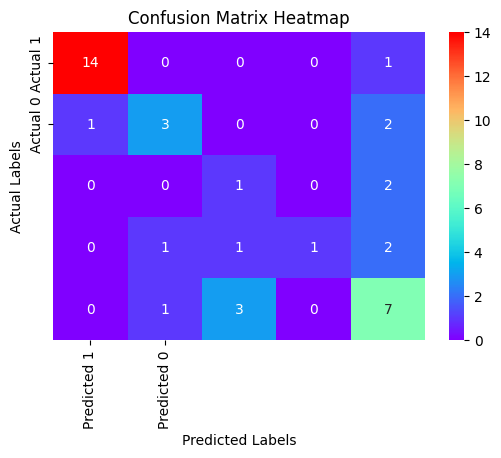

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='rainbow',xticklabels=['Predicted 1','Predicted 0'],yticklabels=['Actual 1','Actual 0'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()